# Foundations for statistical inference - Sampling distributions

In this lab, we investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We're interested in formulating a *sampling distribution* of our estimate in order to learn about the properties of the estimate, such as its distribution.

## The data

We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/ames.csv'
url_content = requests.get(df_url, verify=False).content
ames = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

Let's take a quick peek at the first few rows of the data.

In [2]:
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We see that there are quite a few variables in the data set, enough to do a very in-depth analysis. For this lab, we'll restrict our attention to just two of the variables: the above ground living area of the house in square feet (`Gr.Liv.Area`) and the sale price (`SalePrice`). To save some effort throughout the lab, create two variables with short names that represent these two variables

In [3]:
area = ames['Gr.Liv.Area']
price = ames['SalePrice']

Let's look at the distribution of area in our population of home sales by calculating a few summary statistics and making a histogram.

In [4]:
area.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

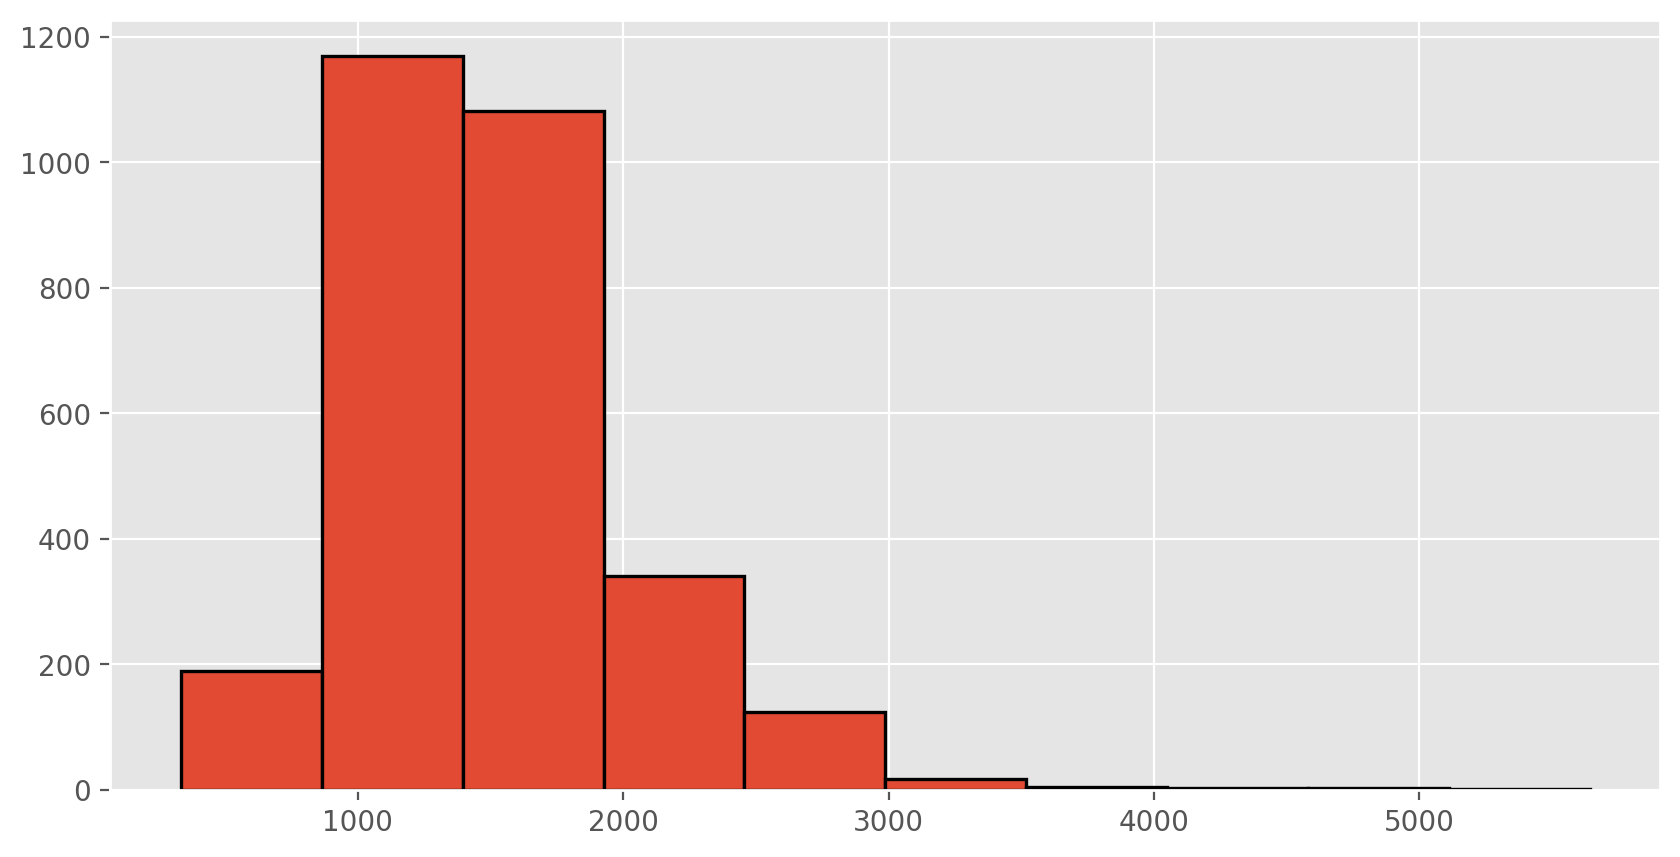

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.hist(area, edgecolor = 'black', linewidth = 1.2)
plt.show();

<div class = 'exercise'>
<h4>Exercise 1</h4>
Describe this population distribution.
</div>

## The unknown sampling distribution

In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [6]:
sampl1 = area.sample(50)

This command collects a simple random sample of size 50 from the vector `area`, which is assigned to `samp1`. This is like going into the City Assessor's database and pulling up the files on 50 random home sales. Working with these 50 files would be considerably simpler than working with all 2930 home sales.

<div class = 'exercise'>
<h4>Exercise 2</h4>
Describe the distribution of this sample. How does it compare to the distribution of the population?
</div>

If we're interested in estimating the average living area in homes in Ames using the sample, our best single guess is the sample mean.

In [7]:
sampl1.mean()

1537.0

Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of 1499.69 square feet. In general, though, the sample mean turns out to be a pretty good estimate of the average living area, and we were able to get it by sampling less than 3% of the population.

<div class = 'exercise'>
<h4>Exercise 3</h4>
    Take a second sample, also of size 50, and call it <code>samp2</code>. How does the mean of <code>samp2</code> compare with the mean of <code>samp1</code>? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?
</div>

Not surprisingly, every time we take another random sample, we get a different sample mean. It's useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the *sampling distribution*, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

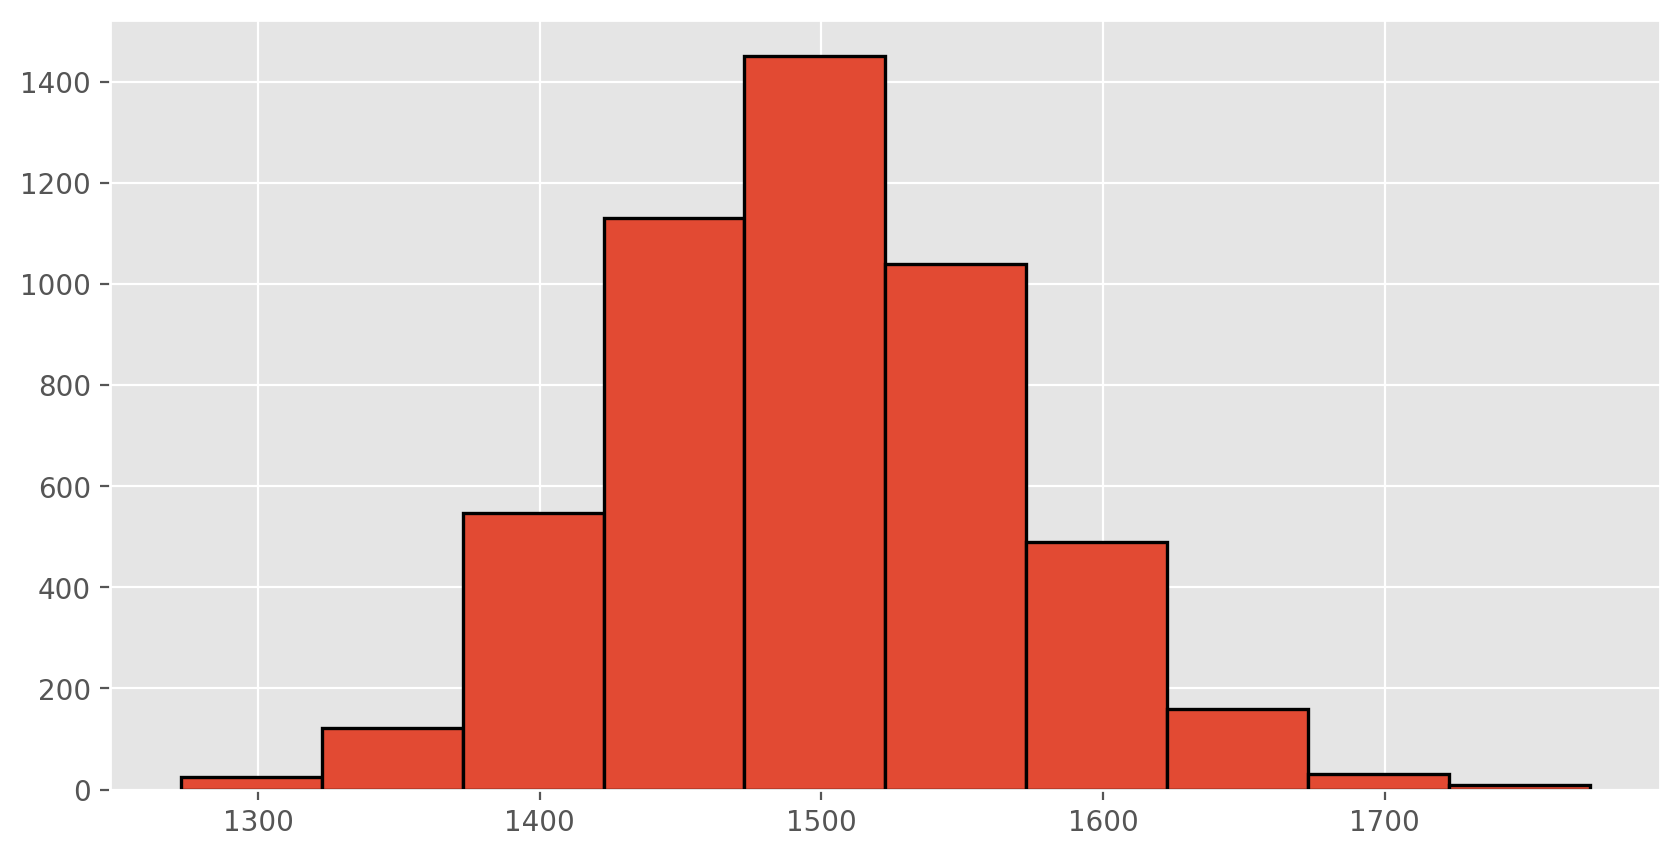

In [8]:
sample_means50 = [area.sample(50).mean() for i in range(0, 5000)]

plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2)
plt.show();

If you would like to adjust the bin width of your histogram to show a little more detail, you can do so by changing the `bins` parameter.

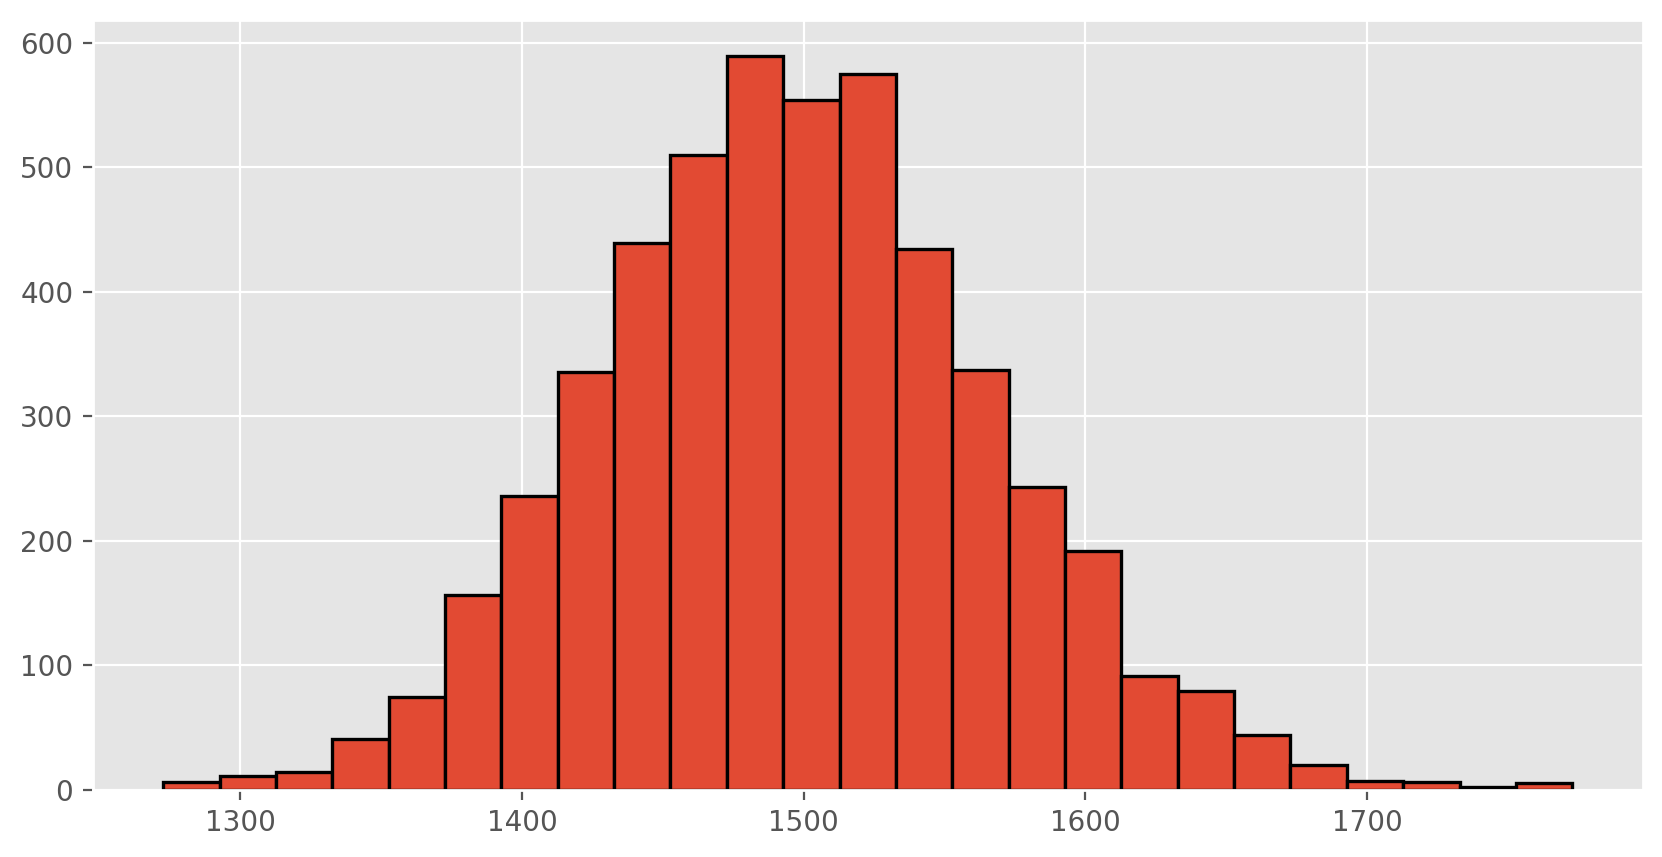

In [9]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, bins = 25)
plt.show();

Here we use Python to take 5000 samples of size 50 from the population, calculate the mean of each sample, and store each result in a variable called `sample_means50`. Next, we'll review how this set of code works.

<div class = 'exercise'>
<h4>Exercise 4</h4>
    How many elements are there in <code>sample_means50</code>? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?
</div>

<div class = 'exercise'>
<h4>Exercise 5</h4>
    Initialize a vector of 100 zeros called <code>sample_means_small</code>. Run a loop that takes a sample of size 50 from  area and stores the sample mean in <code>sample_means_small</code>`, but only iterate from 1 to 100. Print the output. How many elements are there in this object called <code>sample_means_small</code>? What does each element represent?</div>

## Sample size and the sampling distribution

The sampling distribution that we computed tells us much about estimating the average living area in homes in Ames. Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the the population, and the spread of the distribution indicates how much variability is induced by sampling only 50 home sales.

To get a sense of the effect that sample size has on our distribution, let's build up two more sampling distributions: one based on a sample size of 10 and another based on a sample size of 100.

In [10]:
sample_means10 = [area.sample(10).mean() for i in range(0, 5000)]
sample_means100 = [area.sample(100).mean() for i in range(0, 5000)]

To see the effect that different sample sizes have on the sampling distribution, plot the three distributions on top of one another.

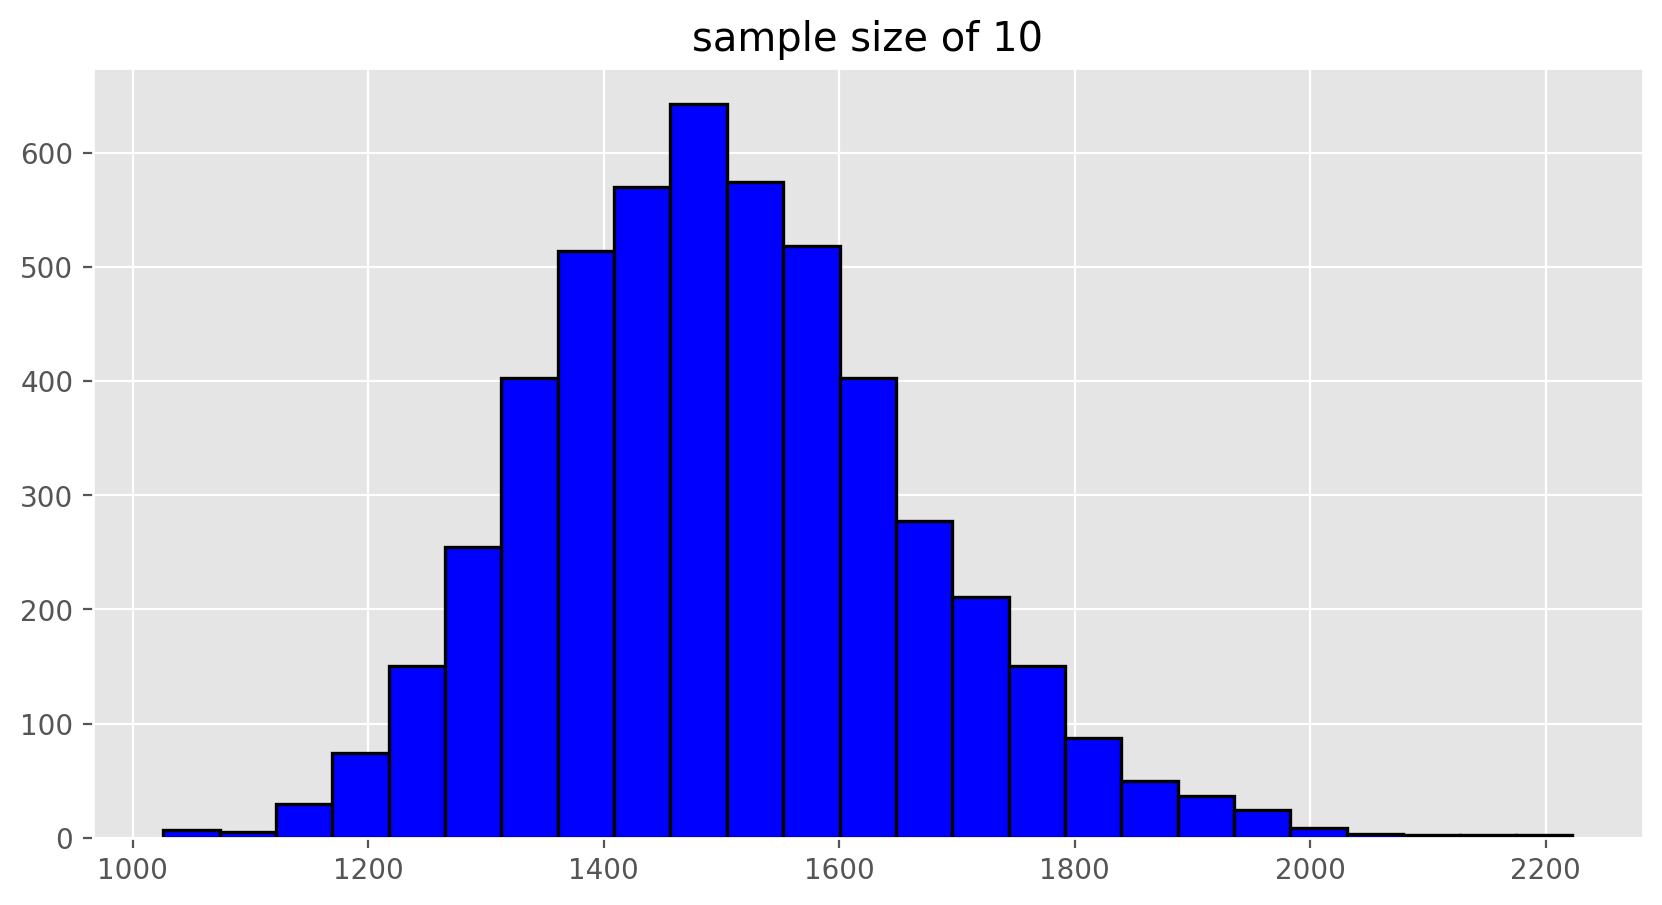

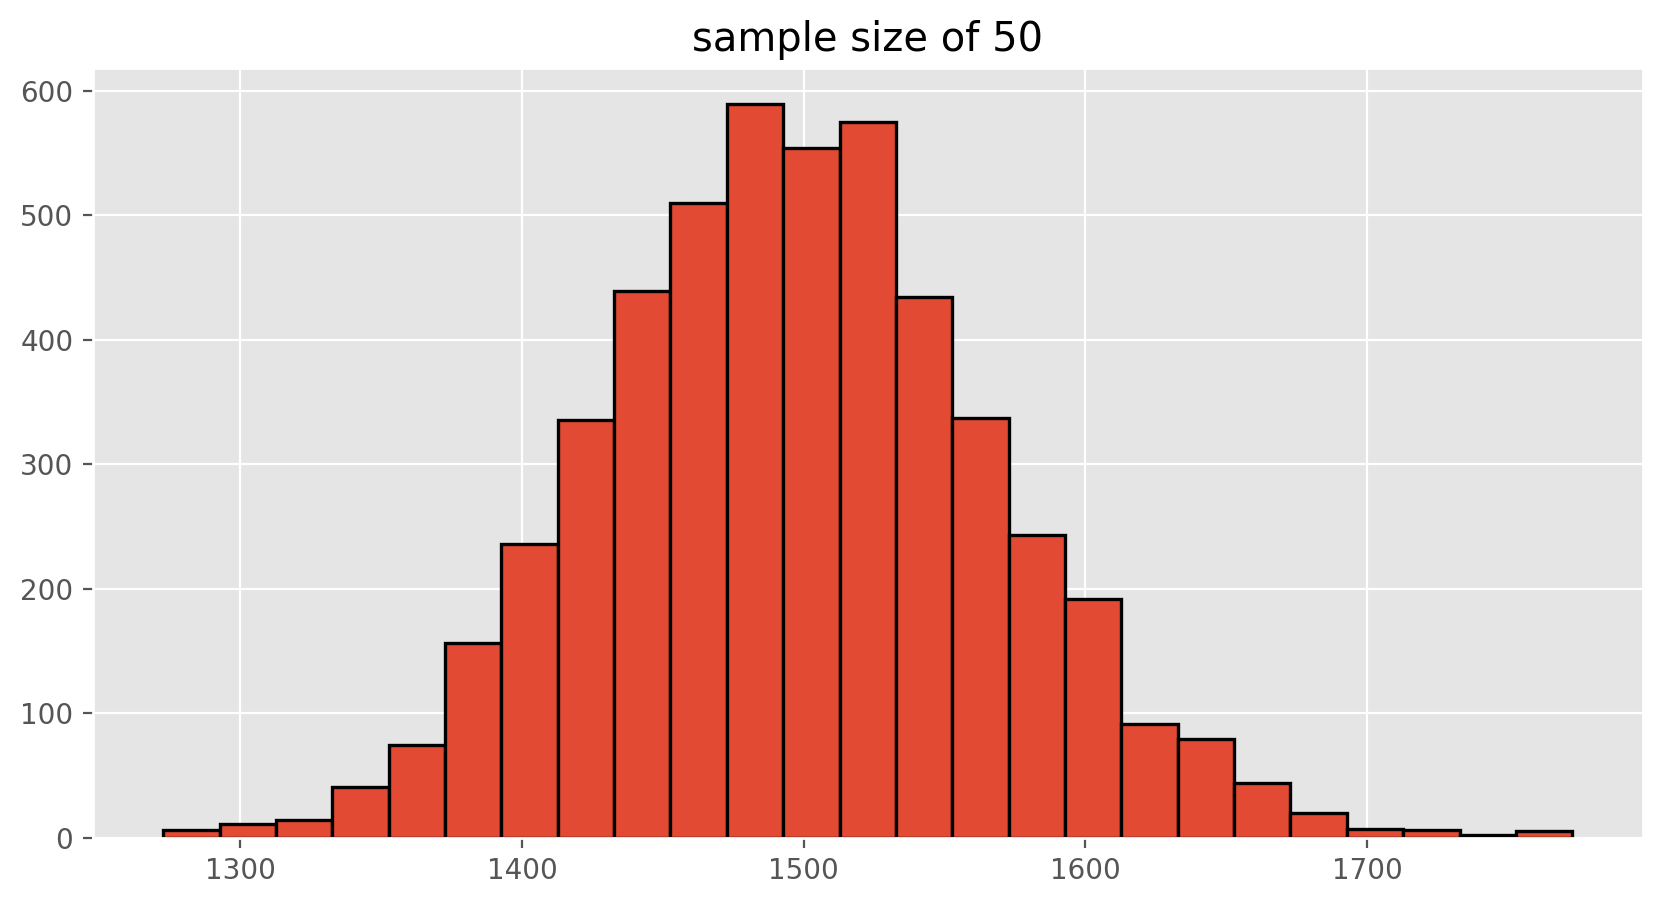

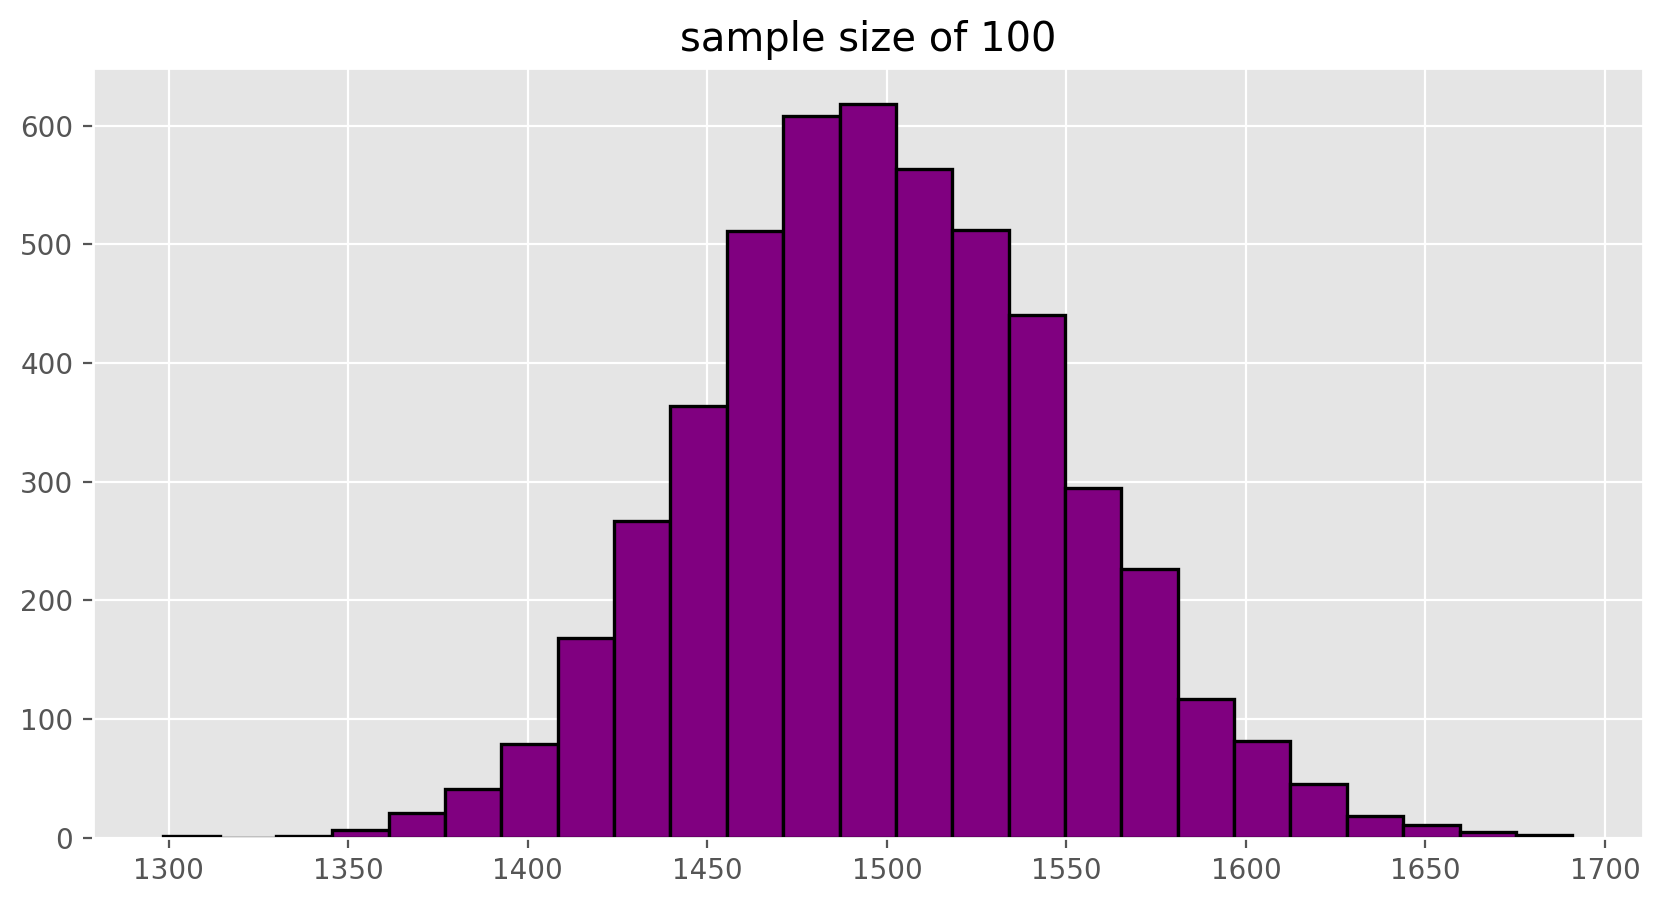

In [11]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means10, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue')
plt.title("sample size of 10")
plt.show();
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, bins = 25)
plt.title("sample size of 50")
plt.show();
plt.hist(sample_means100, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'purple')
plt.title("sample size of 100")
plt.show();

<div class = 'exercise'>
<h4>Exercise 6</h4>
When the sample size is larger, what happens to the center? What about the spread?
</div>

---
## On Your Own

<ol>
<p>So far, we have only focused on estimating the mean living area in homes in Ames. Now you’ll try to estimate the mean home price.</p><br>
    <li>Take a random sample of size 50 from <code>price</code>. Using this sample, what is your best point estimate of the population mean?</li><br>
    <li>Since you have access to the population, simulate the sampling distribution for the average home price in Ames by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called <code>sample_means50</code>. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.</li><br>
    <li>Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called <code>sample_means150</code>. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?</li><br>
    <li>Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?</li>
</ol>

<div class = "license">
This lab was adapted by David Akman and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***